In [1]:
from POP909_Dataset_master.data_process.processor import MidiEventProcessor
import pretty_midi as pyd
import numpy as np
from Code.RNN_file import *
from os import listdir
from tqdm import tqdm

In [2]:
res = np.zeros(128,int)
for folder in tqdm(listdir("Data")):
    for file in (listdir("Data/"+folder)):
        try:
            file_midi = pyd.PrettyMIDI("Data/"+folder+"/"+file)
            for instrument in file_midi.instruments:
                for note in instrument.notes:
                    res[note.pitch]+=1
        except:
            print(folder,file)

  0%|          | 0/21 [00:00<?, ?it/s]c:\Users\Vianey Darsel\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
100%|██████████| 21/21 [02:18<00:00,  6.60s/it]


Dans la figure ci-dessous, on voit que les pitchs/notes les plus utilisées sont entre 23 et 94. On se restreint donc à celles-ci

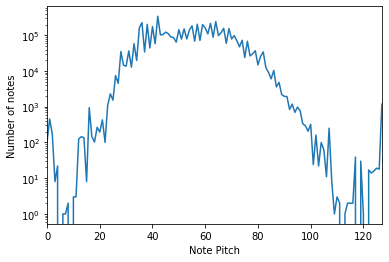

In [3]:
plt.plot(res)
plt.yscale('log')
plt.xlim(0,127)
plt.xlabel("Note Pitch")
plt.ylabel("Number of notes")
plt.show()

In [4]:
res_ser = pd.Series(res)

In [5]:
res_ser[res_ser>1000]

23     1083
24     2300
25     1532
26     7465
27     4537
       ... 
89     2189
90     1953
91     1931
93     1187
127    1179
Length: 71, dtype: int32

In [2]:
length_each = []
for folder in tqdm(listdir("Data")):
    for file in (listdir("Data/"+folder)):
        file_check = pyd.PrettyMIDI("Data/"+folder+"/"+file)
        length_each.append(file_check.time_to_tick(file_check.get_end_time()))

  0%|          | 0/21 [00:00<?, ?it/s]c:\Users\Vianey Darsel\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
 10%|▉         | 2/21 [00:09<01:30,  4.78s/it]


KeyboardInterrupt: 

In [2]:
path_file_array = []
for file in (listdir("Data/beatles")):
    path_file_array.append("Data/beatles/"+file)

In [2]:
path_file_array = []
for folder in tqdm(listdir("Data")):
    for file in (listdir("Data/"+folder)):
        path_file_array.append("Data/"+folder+"/"+file)

100%|██████████| 21/21 [00:00<00:00, 7008.31it/s]


In [3]:
pd.Series(length_each,path_file_array).sort_values().head(11).sort_index()

NameError: name 'length_each' is not defined

# Apprentissage avec un RNN

In [12]:
RNN = RNN_music(23,93,120)

## Apprentissage d'une seule musique

In [15]:
loss_arr, music_arr = Adam_one_file(RNN,"Modified_data/yesterday.mid",5.0,200,0.01)

After 100 updates, loss: 0.7403883078376327
After 200 updates, loss: 0.6804564682531917
After 300 updates, loss: 0.6253797176401813
After 400 updates, loss: 0.5755888399143353
After 500 updates, loss: 0.5305131125993099
After 600 updates, loss: 0.489713347260908
After 700 updates, loss: 0.4526675921920973
After 800 updates, loss: 0.419372795686675
After 900 updates, loss: 0.3892921747001978
After 1000 updates, loss: 0.36194452649218894
After 1100 updates, loss: 0.3374857823113516
After 1200 updates, loss: 0.3151078378805278
After 1300 updates, loss: 0.29490860649861356
After 1400 updates, loss: 0.27659732868127074
After 1500 updates, loss: 0.26007929414691733
After 1600 updates, loss: 0.24520042389038268
After 1700 updates, loss: 0.23169383950684413
After 1800 updates, loss: 0.21920164101319786
After 1900 updates, loss: 0.20821871400086905
After 2000 updates, loss: 0.1980543996523991
After 2100 updates, loss: 0.18916555208033195
After 2200 updates, loss: 0.18094744595506176
After 2300 

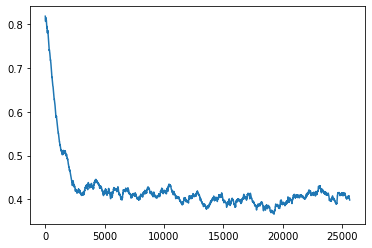

In [6]:
plt.plot(loss_arr)

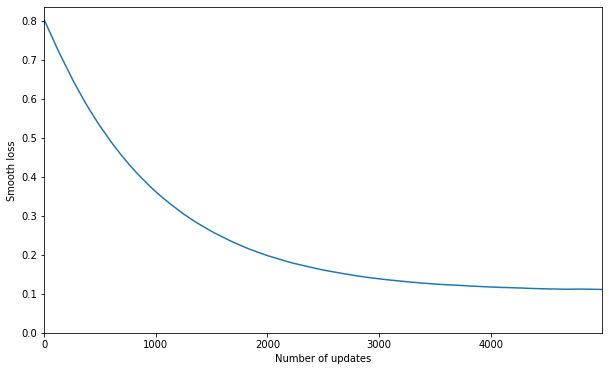

In [17]:
plt.figure(figsize=[10,6])
plt.plot(loss_arr)
plt.xlim(0,len(loss_arr)-1)
plt.ylim(bottom=0)
plt.xlabel("Number of updates")
plt.ylabel("Smooth loss")
plt.show()

2500

In [32]:
res = 0
for j in tqdm(range(len(path_file_array))):
    path = path_file_array[j]
    music_file = pyd.PrettyMIDI(path)
    end_tick = music_file.time_to_tick(music_file.get_end_time())
    res += int(end_tick//2500)

100%|██████████| 1220/1220 [02:29<00:00,  8.15it/s]


In [8]:
length_time=[]
for file_path in path_file_array:
    file_music = pyd.PrettyMIDI(file_path)
    length_time.append(file_music.get_end_time())

c:\Users\Vianey Darsel\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [10]:
pd.Series(length_time,path_file_array).sort_values()

Data/beatles/HerMajesty.mid                   22.217500
Data/beatles/MaggieMae.mid                    38.055774
Data/beatles/WildHoneyPie.mid                 51.428496
Data/beatles/DigIt.mid                        61.196667
Data/beatles/WhatYourDoing.mid                70.930071
                                                ...    
Data/beatles/ADayintheLife(2).mid            288.235220
Data/beatles/ImTheWalrus.mid                 293.646912
Data/beatles/WhileMyGuitarGentlyWeeps.mid    368.833333
Data/beatles/HeyJude (1).mid                 457.297404
Data/beatles/IWantYou.mid                    474.725000
Length: 261, dtype: float64

In [3]:
test = pyd.PrettyMIDI("Data/beatles/ADayInTheLife.mid")

In [46]:
def convert_to_2D(analyze_file : pyd.PrettyMIDI):
    '''Conversion d'un fichier MIDI en np array avec des 0 et 1'''
    n_ticks = test.time_to_tick(test.get_end_time())+1
    res = np.zeros((n_ticks,128),int)
    for i in range(len(analyze_file.instruments)):
        for note in analyze_file.instruments[i].notes:
            tick_start = analyze_file.time_to_tick(note.start)
            tick_end = analyze_file.time_to_tick(note.end)
            for j in range(tick_start,tick_end+1):
                res[j][note.pitch]+=1
    return res

In [49]:
(convert_to_2D(test))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])